# Hotel Booking Cancellations Capstone

**_Christos Anagnostopoulos_**

## Selecting Most Accurate ML model for Predicting Hotel Booking Cancellations 
#### Classification Trees, kNN, Naive Bayes

The data set that we will be using in this assignment contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.
We will use this single data set and try make a prediction by using different algorithms with the goal of deciding which one performs the best.The aim is to create meaningful estimators from the data set we have and to select the model that predicts the cancellation best by comparing them with the accuracy scores of different machine learning models.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('hotel_bookings.csv')

In [3]:
df.head(10)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

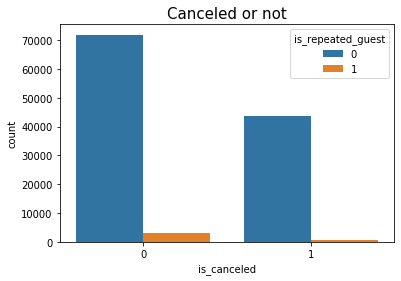

In [5]:
#plot title
plt.title("Canceled or not", fontdict = {'fontsize': 15})

ax = sns.countplot(x="is_canceled", hue="is_repeated_guest", data=df )

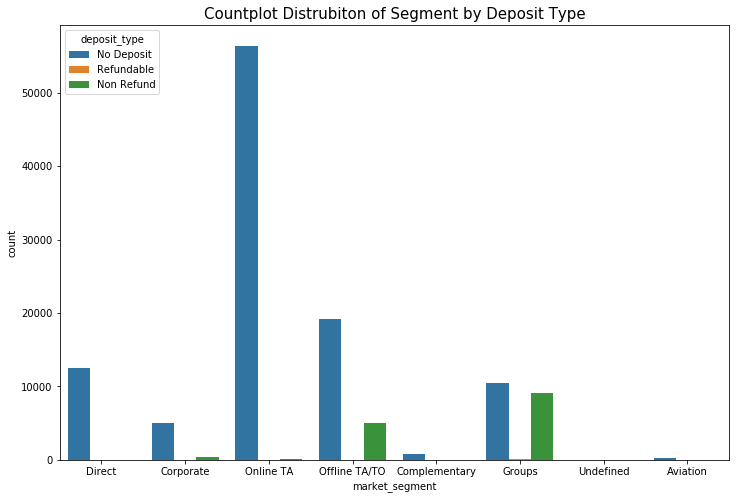

In [6]:
#plot size
plt.figure(figsize = (12,8))
#plot title
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':15})

ax = sns.countplot(x="market_segment", hue="deposit_type", data=df )

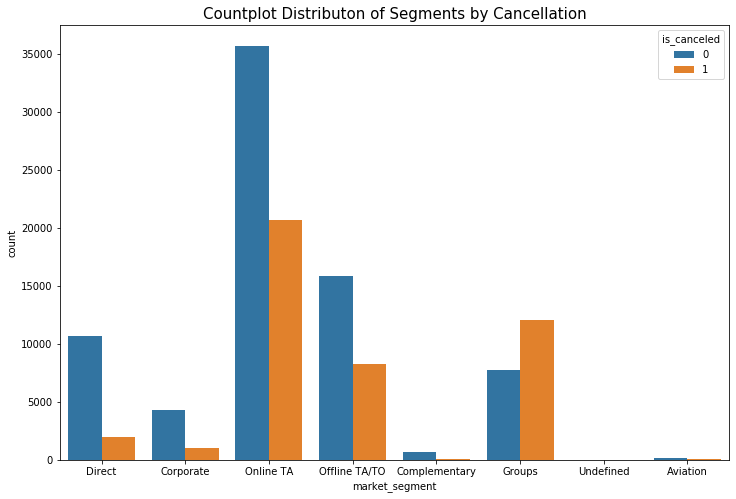

In [7]:
plt.figure(figsize = (12,8))
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':15})

ax = sns.countplot(x="market_segment", hue="is_canceled", data=df )

In [8]:
def perc_mv(x, y):
    perc = y.isnull().sum()/len(x) * 100
    return perc #compute percentage of missing values in each column
    

In [9]:
print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}\nChildren: {}'.format(
    perc_mv(df, df['company']),
    perc_mv(df, df['agent']),
    perc_mv(df, df['country']), 
    perc_mv(df, df['children'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177
Children: 0.003350364352123293


In [10]:
df = df.drop(columns="company") # contains too much NaN values (94%)

In [11]:
df['children'] = df["children"].fillna(0) # encode NaN values in "children" with 0

In [12]:
df
#print(df["children"].isnull().sum())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [13]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [14]:
df['hotel'] = [1 if x=="Resort Hotel" else 0 for x in df["hotel"]] #encode binary categorical values into numerical

In [15]:
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, "February":2, #map months into numerical values
                                                         "March":3, "April":4, "May":5,
                                                         "June":6, "July":7, "August":8,
                                                         "September":9,"October":10,
                                                         "November":11, "December":12,
                                                        })


In [16]:
def family(data):
    #if number of adults > 0 and number of children > 0:
    if data["adults"] > 0 and data["children"] > 0:
        val = 1
    #elif number of adults > 0 and number of babies > 0:
    elif data["adults"] >0 and data["babies"] > 0:
        val = 1
    else:
        val = 0
    return val

In [17]:
def deposit(data):
    
    if data["deposit_type"] == "No Deposit" or data["deposit_type"] == "Refundable":    
        return 0
    else:
        return 1  

In [18]:
def feature(data):
    data["is_family"] = data.apply(family, axis = 1)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["deposit_given"] = data.apply(deposit, axis=1)
    data["total_nights"] = data["stays_in_weekend_nights"]+ data["stays_in_week_nights"]
    return data


In [19]:
df = feature(df)

In [20]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,deposit_given,total_nights
0,1,0,342,2015,7,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0,0,0
1,1,0,737,2015,7,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,0,2.0,0,0
2,1,0,7,2015,7,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,0,1.0,0,1
3,1,0,13,2015,7,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,0,1.0,0,1
4,1,0,14,2015,7,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,0,2.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,8,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,0,2.0,0,7
119386,0,0,102,2017,8,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,0,3.0,0,7
119387,0,0,34,2017,8,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,0,2.0,0,7
119388,0,0,109,2017,8,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,0,2.0,0,7


In [21]:
df = df.drop(columns=["adults","children","babies","deposit_type","reservation_status_date"])


In [97]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
agent                             16340
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0


In [22]:
cor_df = df.copy()

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder() #instantiate LabelEncoder object in order to encode ["reservation_status"]
cor_df['reservation_status'] = le.fit_transform(cor_df['reservation_status']) 

In [25]:
cor_df.corr() #visualise correlation table

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,...,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
hotel,1.000000,-0.136531,-0.075381,-0.035267,-0.001817,-0.001270,0.001862,0.186596,0.234020,0.050421,...,0.790232,-0.072432,-0.096719,0.218873,0.043390,0.124331,0.058306,0.040821,-0.172003,0.247479
is_canceled,-0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,-0.084793,...,-0.083114,0.054186,0.047557,-0.195498,-0.234658,-0.917196,-0.013010,0.046522,0.481457,0.017779
lead_time,-0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,-0.124410,...,-0.069741,0.170084,-0.063077,-0.116451,-0.095712,-0.302175,-0.043972,0.072265,0.380179,0.157167
arrival_date_year,-0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.010341,...,0.063457,-0.056497,0.197580,-0.013684,0.108531,-0.017683,0.052711,0.052127,-0.065963,0.031438
arrival_date_month,-0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,-0.030729,...,-0.030534,0.019045,0.079315,0.000257,0.028026,-0.021090,0.010427,0.027252,0.008746,0.021536
arrival_date_week_number,-0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,-0.030131,...,-0.031201,0.022933,0.075791,0.001920,0.026149,-0.017387,0.010611,0.025220,0.007773,0.018719
arrival_date_day_of_month,0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.006145,...,0.001487,0.022728,0.030245,0.008683,0.003062,0.011460,0.014710,0.006742,-0.008616,-0.027408
stays_in_weekend_nights,0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,-0.087239,...,0.140739,-0.054151,0.049342,-0.018554,0.072671,0.008558,0.052306,0.101426,-0.114275,0.762790
stays_in_week_nights,0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,-0.097245,...,0.182382,-0.002020,0.065237,-0.024859,0.068192,-0.021607,0.050424,0.101665,-0.079999,0.941005
is_repeated_guest,0.050421,-0.084793,-0.124410,0.010341,-0.030729,-0.030131,-0.006145,-0.087239,-0.097245,1.000000,...,0.031527,-0.022235,-0.134314,0.077090,0.013050,0.083504,-0.035127,-0.136748,-0.058423,-0.106626


In [26]:
cor_df.corr().is_canceled.sort_values(ascending=False) #Descending order of corr values

is_canceled                       1.000000
deposit_given                     0.481457
lead_time                         0.293123
previous_cancellations            0.110133
days_in_waiting_list              0.054186
adr                               0.047557
total_customer                    0.046522
stays_in_week_nights              0.024765
total_nights                      0.017779
arrival_date_year                 0.016660
arrival_date_month                0.011022
arrival_date_week_number          0.008148
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
is_family                        -0.013010
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
hotel                            -0.136531
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
reservation_status               -0.917196
Name: is_ca

In [27]:
df = df.drop(columns=["arrival_date_week_number","stays_in_weekend_nights",
                     "arrival_date_day_of_month","agent"])

In [28]:
indices = df.loc[pd.isna(df["country"]), :].index #delete the NA row of ["country"]
df = df.drop(df.index[indices])  

In [29]:
cols = ["meal", "market_segment","distribution_channel",
       "reserved_room_type", "assigned_room_type", "customer_type","reservation_status"]
df = pd.get_dummies(df, columns=cols) #encode categorical values into numerical

In [30]:
le = LabelEncoder()
df['country'] = le.fit_transform(df["country"]) 

In [31]:
df.isnull().sum()

hotel                            0
is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
                                ..
customer_type_Transient          0
customer_type_Transient-Party    0
reservation_status_Canceled      0
reservation_status_Check-Out     0
reservation_status_No-Show       0
Length: 66, dtype: int64

In [32]:
X = np.array(df.loc[: , [i for i in list(df.columns) if i not in ["is_canceled"]]]) #split data into predictor and output values
y = np.array(df.is_canceled)
print(len(X),len(y))

118902 118902


In [33]:
from sklearn.model_selection import train_test_split #split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(max_depth = 12)

In [35]:
cart_model = cart.fit(X_train, y_train) #fit model with train data
y_pred_cart = cart_model.predict(X_test) #predict with test data

In [36]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
print('Decision Tree Model - reservation_status included')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred_cart), confusion_matrix(y_test,y_pred_cart), roc_auc_score(y_test,y_pred_cart)))

Decision Tree Model - reservation_status included
Accuracy Score: 1.0

Confusion Matrix:
 [[22353     0]
 [    0 13318]]

AUC Score: 1.0


We see that with reservation_status column our model has 100% accuracy.
This justifies because reservation_status has very high nevgative correlation
with our outcome value. What if we train a new model without this column ?

In [37]:
df = df.drop(columns=["reservation_status_Canceled","reservation_status_Check-Out",
                     "reservation_status_No-Show"])

In [38]:
y = df.iloc[: , 1]
X = df.loc[: , [i for i in list(df.columns) if i not in ["is_canceled"]]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
X = X.values.astype(np.float)
y = y.values.astype(np.float)

In [39]:
dt = DecisionTreeClassifier(max_depth=12)

In [40]:
dt_model = dt.fit(X_train, y_train)
y_pred_dt =dt_model.predict(X_test)

In [41]:
print('Decision Tree Model - reservation_status excluded')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred_dt), 
              confusion_matrix(y_test,y_pred_dt),
              roc_auc_score(y_test,y_pred_dt)))

Decision Tree Model - reservation_status excluded
Accuracy Score: 0.8466261108463458

Confusion Matrix:
 [[20363  1990]
 [ 3481  9837]]

AUC Score: 0.8247991682852405


In [42]:
from sklearn.neighbors import KNeighborsClassifier #kNN Classifier, k=10
knn = KNeighborsClassifier(n_neighbors = 10, p = 1)

In [43]:
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [44]:
print('K-Nearest Neighbors')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred_knn), 
              confusion_matrix(y_test,y_pred_knn),
              roc_auc_score(y_test,y_pred_knn)))

K-Nearest Neighbors
Accuracy Score: 0.8042107033724875

Confusion Matrix:
 [[20115  2238]
 [ 4746  8572]]

AUC Score: 0.7717596985291642


We see that kNN classifier performs poorer than TreeClassifier.

In [45]:
from sklearn.naive_bayes  import GaussianNB  #Naive Bayes Classifier
nb  = GaussianNB()

In [46]:
nb_model = nb.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [47]:
print('Naïve Bayes')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred_nb), 
              confusion_matrix(y_test,y_pred_nb),
              roc_auc_score(y_test,y_pred_nb)))

Naïve Bayes
Accuracy Score: 0.586246530795324

Confusion Matrix:
 [[ 9602 12751]
 [ 2008 11310]]

AUC Score: 0.6393943190352707


Naive Bayes performs the worst because it assumes independece between the features.
